# Robustness and Plasticity in Regulatory Networks

* [Introduction](./RPRN-Introduction.ipynb)
* [BoolNet](./RPRN-BoolNet.ipynb)
* [Functions](#Functions)
    * [Overexpression and KnockOuts](#Overexpression-and-KnockOuts)
    * [Fixed environments](#Fixed-environments)
    * [Truth tables](#Truth-tables)
* [Updating](./RPRN-Updating.ipynb)
* [States](./RPRN-States.ipynb)
* [Appendix](./RPRN-Appendix.ipynb)

# Functions

Functions recapitulate the regulatory interactions and determine the dynamic of the Boolean regulatory network. They are limited by the topology, as nodes can only be directly influeced by their regulators. Changing the functions of a network can create a whole new network. This new network may share some attractors -or cell types- with the original network, but it may also lose or gain other attractors.

The changes in the functions of a network can be associated with multiple biological phenomena. Experiments, environmental factors, evolution, epigenetics and the intrinsic flexibility of the regulatory mechanisms all alter the iteractions of the regulatory network of a biological system.

In this tutorial we will use some of the existing BoolNet functions to study the effect of perturbing the network functions. We will also use some of the labeling functions we discussed in the [BoolNet]((./RPRN-BoolNet.ipynb)) introduction.

In [2]:
#Uncomment next line if you haven't installed BoolNet
#install.packages("BoolNet", repos='http://cran.us.r-project.org')
library(BoolNet)
source("./BoolNet-extensions.R")

## Overexpression and KnockOuts

A lot of experiments  inhibit or overexpress genes, with is equivalent to fixing the functions to 0 or 1. Studing this perturbations is useful for validating the network with known gain and loss of function experiments. It can also be used to predict the effect of difficult experiments like letal or conditional mutants.

First, we need to know how our wild type network will behave. We will use the Th17/iTreg network.

In [3]:
net <- loadNetwork("minTh17iTreg.txt")
WT.attr <- getAttractors(net)

However, analysing this structure can be complicated, we will label them and convert them to a data frame. Here we will use the __attractor2dataframe()__ and __labelAttractors()__ functions.

First we will declare our labelling rules.

In [4]:
labels.rules <- data.frame(
    labels = c('Th0', 'Th17', 'Treg', 'IL10+', 'TGFB+', 'RORGT+'),
    rules  = c('!(RORGT | FOXP3 | TGFB | IL10)', 
            'RORGT & STAT3', 
            'FOXP3 & TGFB', 
            'IL10', 
            'TGFB & ! (RORGT | FOXP3)', 
            'RORGT & ! STAT3' ),
    stringsAsFactors = FALSE
)
labels.rules

,labels,rules
1,Th0,!(RORGT | FOXP3 | TGFB | IL10)
2,Th17,RORGT & STAT3
3,Treg,FOXP3 & TGFB
4,IL10+,IL10
5,TGFB+,TGFB & ! (RORGT | FOXP3)
6,RORGT+,RORGT & ! STAT3


Next we will create a data frame with the information of the labeled attractors.

In [5]:
WT.attr.df <- attractor2dataframe(WT.attr) 
WT.labels <- labelAttractors(WT.attr, net$genes, labels.rules$labels, labels.rules$rules)
WT.attr.df$label <- sapply(WT.labels, function(l) paste(as.character(l), collapse='/')  )
WT.attr.df

,involvedStates,basinSize,label
1,0,27,Th0
2,1,2,Th0
3,4,14,Th0
4,16,13,TGFB+
5,48,8,IL10+TGFB+
6,65,35,Th0
7,68,8,Th0
8,89,13,Treg
9,112,3,IL10+TGFB+
10,121,1,TregIL10+


We can reduce this table to express the states and the total basin size according with the labels.

In [6]:
WT.by.label <- data.frame(
    states = tapply(WT.attr.df$involvedStates, WT.attr.df$label, paste),
    basin = tapply(WT.attr.df$basin, WT.attr.df$label, sum)
)
WT.by.label

,states,basin
IL10+,"544, 608, 672, 736",178
IL10+TGFB+,"48, 112, 176, 240, 304, 368, 432, 496, 560, 624, 688, 752, 816, 880, 944, 1008",371
IL10+TGFB+/TregIL10+,"113/120, 241/248, 369/376, 497/504, 625/632, 753/760, 881/888, 1009/1016",67
RORGT+/TGFB+,"338/341, 466/469",26
TGFB+,"16, 272",39
Th0,"0, 1, 4, 65, 68, 132, 129, 193, 196",152
Th0/Th0,192/197,36
Th17,"278, 342, 406, 470",70
Treg,"89, 217, 345, 473",61
TregIL10+,"121, 249, 377, 505, 633, 761, 889, 1017",24


Now that we know the behavior of the WT network we can begin to perturb it. 

We will do a knock-out experiment, where the value of STAT3 will always be zero. This would be equivalent to deleting the STAT3 gene or inhibiting all the signaling pathways that end in STAT3 activation.

We can fix the value of the node in the original network or we can create a second mutant network. 

In [7]:
KO.net <- fixGenes(net, "STAT3", 0)
KO.net

Boolean network with 10 genes

Involved genes:
IL2 RORGT STAT3 FOXP3 TGFB IL10 IL2e IL21e TGFBe IL10e

Transition functions:
IL2 = (IL2e | (IL2 &  ! FOXP3)) &  ! (STAT3 | (IL10 & ! FOXP3))
RORGT = (STAT3 & TGFB) &  ! FOXP3
STAT3 = (IL21e | STAT3 | RORGT) &  ! (IL10 | IL2)
FOXP3 = (IL2 & (TGFB | FOXP3)) &  ! (STAT3 | RORGT)
TGFB = TGFBe | ((TGFB | FOXP3) &  ! STAT3 )
IL10 = IL10e | (IL10 & (STAT3 | TGFB))
IL2e = IL2e
IL21e = IL21e
TGFBe = TGFBe
IL10e = IL10e

Knocked-out and over-expressed genes:
STAT3 = 0

When doing this be careful of checking the value of the fixed genes to avoid mistakes. You can see this in network$fixed, if the value is -1 BoolNet will use the original function, if the value is 0 the node value will always be 0, and if the value is 1 the node value will always be 1.

In [8]:
KO.net$fixed

IL2 RORGT STAT3 FOXP3  TGFB  IL10  IL2e IL21e TGFBe IL10e 
   -1    -1     0    -1    -1    -1    -1    -1    -1    -1

Now we will determine the attractors, label them, and save them to a dataframe.

In [9]:
KO.attr <- getAttractors(KO.net)
KO.attr.df <- attractor2dataframe(KO.attr) 

KO.labels <- labelAttractors(KO.attr, net$genes, labels.rules$labels, labels.rules$rules)
KO.attr.df$label <- sapply(KO.labels, function(l)  paste(as.character(l), collapse='/')  )
KO.attr.df

,involvedStates,basinSize,label
1,0,6,Th0
2,1,2,Th0
3,16,16,TGFB+
4,48,8,IL10+TGFB+
5,65,8,Th0
6,89,16,Treg
7,112,3,IL10+TGFB+
8,121,1,TregIL10+
9,128,6,Th0
10,129,2,Th0


We  can also simulate overexpressions, where the value of STAT3 will always be 1. This would be equivalent to having the STAT3 pathway constitutionally active.

We will create the network, determine the attractors, label them and present them as a dataframe.

In [10]:
Over.net <- fixGenes(net, "STAT3", 1)

Over.attr <- getAttractors(Over.net)
Over.attr.df <- attractor2dataframe(Over.attr) 

Over.labels <- labelAttractors(Over.attr, net$genes, labels.rules$labels, labels.rules$rules)
Over.attr.df$label <- sapply(Over.labels, function(l)  paste(as.character(l), collapse='/')  )
Over.attr.df

,involvedStates,basinSize,label
1,4,16,Th0
2,36,16,IL10+
3,68,16,Th0
4,100,16,IL10+
5,132,16,Th0
6,164,16,IL10+
7,196,16,Th0
8,228,16,IL10+
9,278,16,Th17
10,310,16,Th17IL10+


Now we can compare the three networks. Lets begin by seeing the cell types that where recovered in each network.

In [11]:
unique(WT.attr.df$label)
unique(KO.attr.df$label)
unique(Over.attr.df$label)

[1] "Th0"                  "TGFB+"                "IL10+TGFB+"          
 [4] "Treg"                 "TregIL10+"            "Th17"                
 [7] "IL10+"                "IL10+TGFB+/TregIL10+" "Th0/Th0"             
[10] "RORGT+/TGFB+"

[1] "Th0"                  "TGFB+"                "IL10+TGFB+"          
[4] "Treg"                 "TregIL10+"            "IL10+"               
[7] "IL10+TGFB+/TregIL10+"

[1] "Th0"       "IL10+"     "Th17"      "Th17IL10+"

We can see that in the STAT3 KO we attractors like Th17 and some cycles. In the STAT3 over-expression we lose most of the regulatory attractors and the cycles, but we win a new Th17IL10+ attractor.

We can use the function __perturbNetworkFixedNodes()__ to obtain the attractors and basins of the different fixed networks. By default, this method obtains all the single node knockouts and overexpressions. The function returns a dataframe where the rownames are the states and each column corresponds to the basin size of a fixed network. If the attractor cannot be found in a network it returns NA.

In [12]:
mutants <- perturbNetworkFixedNodes(net)
mutants

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋱"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋱"): invalid factor level, NA generated

,WT.basinSize,IL2_0.basinSize,RORGT_0.basinSize,STAT3_0.basinSize,FOXP3_0.basinSize,TGFB_0.basinSize,IL10_0.basinSize,IL2e_0.basinSize,IL21e_0.basinSize,TGFBe_0.basinSize,ellip.h,IL2_1.basinSize,RORGT_1.basinSize,STAT3_1.basinSize,FOXP3_1.basinSize,TGFB_1.basinSize,IL10_1.basinSize,IL2e_1.basinSize,IL21e_1.basinSize,TGFBe_1.basinSize,IL10e_1.basinSize
0,27,11,15,6,15,24,7,27,27,27,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,2,NA,1,2,2,2,2,2,2,2,⋯,20,NA,NA,NA,NA,NA,NA,NA,NA,NA
100,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,16,NA,NA,NA,NA,NA,NA,NA
1001,NA,NA,NA,NA,NA,2,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1008,47,32,23,7,32,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,23,23,47,47,47,47
1009/1016,12,NA,4,20,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,6,7,12,12,12,12
1010,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,32,NA,NA,NA,NA,NA,NA,NA,NA
1014,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,32,NA,NA,NA,NA,NA,NA,NA
1017,5,NA,5,5,NA,NA,NA,NA,NA,NA,⋯,32,NA,NA,32,3,2,5,5,5,5
112,3,4,1,3,4,NA,NA,NA,3,3,⋯,NA,NA,NA,NA,11,3,3,NA,NA,NA


Now, lets label the states.

In [13]:
labels <- lapply(rownames(mutants), function(states) {
    states <- as.numeric(unlist(strsplit(states, "/")))
    label <- lapply(states, function(s) {
        s <- dec2binState(s, net$genes)
        l <- labelState(s, net$genes, labels.rules$labels, labels.rules$rules)
    })  
    label <- paste(label, collapse='/')
})
mutants$label <- as.character(labels)
mutants

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋱"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋱"): invalid factor level, NA generated

,WT.basinSize,IL2_0.basinSize,RORGT_0.basinSize,STAT3_0.basinSize,FOXP3_0.basinSize,TGFB_0.basinSize,IL10_0.basinSize,IL2e_0.basinSize,IL21e_0.basinSize,TGFBe_0.basinSize,ellip.h,RORGT_1.basinSize,STAT3_1.basinSize,FOXP3_1.basinSize,TGFB_1.basinSize,IL10_1.basinSize,IL2e_1.basinSize,IL21e_1.basinSize,TGFBe_1.basinSize,IL10e_1.basinSize,label
0,27,11,15,6,15,24,7,27,27,27,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,Th0
1,2,NA,1,2,2,2,2,2,2,2,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,Th0
100,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,16,NA,NA,NA,NA,NA,NA,NA,IL10+
1001,NA,NA,NA,NA,NA,2,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,IL10+
1008,47,32,23,7,32,NA,NA,NA,NA,NA,⋯,NA,NA,NA,23,23,47,47,47,47,IL10+TGFB+
1009/1016,12,NA,4,20,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,6,7,12,12,12,12,IL10+TGFB+/TregIL10+
1010,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,32,NA,NA,NA,NA,NA,NA,NA,NA,IL10+RORGT+
1014,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,32,NA,NA,NA,NA,NA,NA,NA,Th17IL10+
1017,5,NA,5,5,NA,NA,NA,NA,NA,NA,⋯,NA,NA,32,3,2,5,5,5,5,TregIL10+
112,3,4,1,3,4,NA,NA,NA,3,3,⋯,NA,NA,NA,11,3,3,NA,NA,NA,IL10+TGFB+


This dataframe is very complicated, we can reduce it by label. As we will use __colSums__ we replaced the NAs for 0.

In [14]:
mutants[is.na(mutants)] <- 0 # NAs to 0
mutants.by.label <- by(mutants[, 1:(length(mutants)-1)], mutants$label, colSums) #colSums by label
mutants.by.label <- t(sapply(mutants.by.label, function(label) label )) #simplify and transpose
mutants.by.label

,WT.basinSize,IL2_0.basinSize,RORGT_0.basinSize,STAT3_0.basinSize,FOXP3_0.basinSize,TGFB_0.basinSize,IL10_0.basinSize,IL2e_0.basinSize,IL21e_0.basinSize,TGFBe_0.basinSize,,IL2_1.basinSize,RORGT_1.basinSize,STAT3_1.basinSize,FOXP3_1.basinSize,TGFB_1.basinSize,IL10_1.basinSize,IL2e_1.basinSize,IL21e_1.basinSize,TGFBe_1.basinSize,IL10e_1.basinSize
IL10+,178,98,86,32,102,256,0,89,86,178,⋯,80,0,192,0,0,160,89,92,0,178
IL10+RORGT+,0,0,0,0,0,0,0,0,0,0,⋯,0,320,0,0,0,0,0,0,0,0
IL10+TGFB+,371,222,181,176,218,0,0,231,185,67,⋯,0,0,0,0,324,280,140,186,304,263
IL10+TGFB+/TregIL10+,67,0,29,88,0,0,0,0,37,31,⋯,0,0,0,0,44,56,67,30,36,51
NoLabel,0,0,0,0,0,8,0,0,0,0,⋯,0,0,0,42,0,0,0,0,0,0
NoLabel/Treg,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,8,0,0,0,0,0,0
RORGT+,0,0,0,0,0,0,0,0,0,0,⋯,0,32,0,0,0,0,0,0,0,0
RORGT+/TGFB+,26,0,0,0,16,0,44,0,6,0,⋯,0,0,0,0,24,0,26,20,26,0
RORGT+/Th17,0,0,0,0,0,0,0,0,0,0,⋯,0,56,0,0,0,0,0,0,0,0
TGFB+,39,26,56,80,42,0,54,39,39,13,⋯,0,0,0,0,16,0,0,0,26,0


Too disordered, lets rename the columns and order the labels.

In [15]:
colnames(mutants.by.label) <- lapply(colnames(mutants.by.label), function(s) {
    unlist(strsplit(s, split='.', fixed=TRUE))[1]
})
mutants.by.label <- mutants.by.label[ c(
    'Th0', 'Th17', 'Treg', 'TregIL10+', 'IL10+', 'TGFB+', 'IL10+TGFB+', 
    'RORGT+', 'IL10+RORGT+', 'Th17IL10+', 'NoLabel', 
    'Th0/Th0', 'RORGT+/Th17', 'RORGT+/TGFB+', 'TGFB+/TGFB+', 
    'Treg/Treg', 'IL10+TGFB+/TregIL10+', 'NoLabel/Treg'
) , ]
mutants.by.label

,WT,IL2_0,RORGT_0,STAT3_0,FOXP3_0,TGFB_0,IL10_0,IL2e_0,IL21e_0,TGFBe_0,,IL2_1,RORGT_1,STAT3_1,FOXP3_1,TGFB_1,IL10_1,IL2e_1,IL21e_1,TGFBe_1,IL10e_1
Th0,152,102,73,32,82,208,176,99,86,152,⋯,80,0,64,0,0,0,53,66,0,0
Th17,70,64,0,0,32,0,124,54,22,0,⋯,0,104,64,0,64,0,16,48,70,0
Treg,61,0,35,80,0,0,82,0,39,23,⋯,112,0,0,134,24,0,61,22,38,0
TregIL10+,24,0,24,24,0,0,0,0,12,12,⋯,240,0,0,320,16,16,24,12,12,20
IL10+,178,98,86,32,102,256,0,89,86,178,⋯,80,0,192,0,0,160,89,92,0,178
TGFB+,39,26,56,80,42,0,54,39,39,13,⋯,0,0,0,0,16,0,0,0,26,0
IL10+TGFB+,371,222,181,176,218,0,0,231,185,67,⋯,0,0,0,0,324,280,140,186,304,263
RORGT+,0,0,0,0,0,0,0,0,0,0,⋯,0,32,0,0,0,0,0,0,0,0
IL10+RORGT+,0,0,0,0,0,0,0,0,0,0,⋯,0,320,0,0,0,0,0,0,0,0
Th17IL10+,0,0,0,0,0,0,0,0,0,0,⋯,0,0,192,0,0,0,0,0,0,0


Still to complicated, lets plot it.

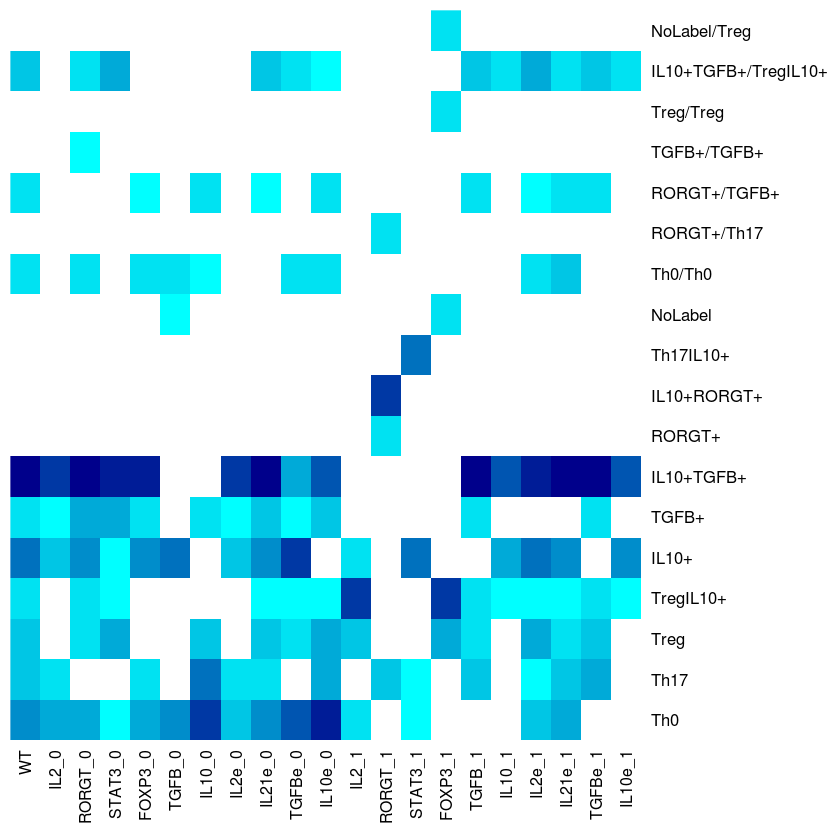

In [16]:
mutants.by.label.matrix <- data.matrix(mutants.by.label) #convert to matrix
mutants.by.label.matrix[mutants.by.label.matrix==0] <- NA #replace 0s for NAs
colfunc <- colorRampPalette(c("cyan", "darkblue")) #nice color scale
mutants.heatmap <- heatmap(mutants.by.label.matrix,  # the heatmap
                            Rowv=NA, Colv=NA, 
                            col= colfunc(10),
                            #col=brewer.pal(3,"Blues"), 
                            scale="column", margins=c(5,10))

As you can see this method fixed created single knockouts and overexpressions for both the genes and signalling pathways and for the input signals. Next we will simulate particular environments and study how changes in the environment affect differentiation and plasticity.

TODO: BIOLOGICAL DISCUSSION

## Fixed environments

The state of a network usually depends in external factors -that can be modeled as inputs. It is possible to simulate the change from one environment to an other by fixing the input nodes to simulate the different environments\cite{Thieffry}. In this section we will study the effect of permanetly changing the environment of a cell type, we will discuss the effect of [transient perturbations later](./RPRN-States.ipynb).

Until now we have studied the attractors we can reach in all possible environmental conditions. However, cell types are usually restricted by their microenvironment.

In the Th17/iTreg model we can define various environments:
* pro-Th0 :   no extrinsic cytokines
* pro-Th17: IL21+ and TGFB+
* pro-iTreg: IL2+ and TGFB+
* pro-IL10 : IL10+

We can represent this environments by fixing the values of the corresponding nodes.

In [17]:
environments <- list(
    label = c("All","pro-Th0", "pro-Th17", "pro-iTreg", "pro-IL10"),
    nodes = c(NA, rep(list(c("IL2e", "IL21e", "TGFBe", "IL10e")), 4)),
    values = list(NA, c(0,0,0,0), c(0,1,1,0), c(1,0,1,0), c(0,0,0,1))
)
environments

$label
[1] "All"       "pro-Th0"   "pro-Th17"  "pro-iTreg" "pro-IL10" 

$nodes
$nodes[[1]]
[1] NA

$nodes[[2]]
[1] "IL2e"  "IL21e" "TGFBe" "IL10e"

$nodes[[3]]
[1] "IL2e"  "IL21e" "TGFBe" "IL10e"

$nodes[[4]]
[1] "IL2e"  "IL21e" "TGFBe" "IL10e"

$nodes[[5]]
[1] "IL2e"  "IL21e" "TGFBe" "IL10e"


$values
$values[[1]]
[1] NA

$values[[2]]
[1] 0 0 0 0

$values[[3]]
[1] 0 1 1 0

$values[[4]]
[1] 1 0 1 0

$values[[5]]
[1] 0 0 0 1

The function __perturbNetworkFixedNodes__ can simulate multiple fixed genes if we pass them as a vector inside a list. For example:

In [18]:
env.attr <- perturbNetworkFixedNodes(net, environments$nodes, environments$value, environments$label)
env.attr

,All.basinSize,pro-Th0.basinSize,pro-Th17.basinSize,pro-iTreg.basinSize,pro-IL10.basinSize
0,27,27,NA,NA,NA
1,2,2,NA,NA,NA
1008,47,NA,NA,NA,NA
1009/1016,12,NA,NA,NA,NA
1017,5,NA,NA,NA,NA
112,3,NA,NA,NA,NA
113/120,4,NA,NA,NA,NA
121,1,NA,NA,NA,NA
129,2,NA,NA,NA,NA
132,54,NA,NA,NA,NA


Now lets label and group accoding to the label.

In [19]:
# label attractors
env.attr$label <- unlist(lapply(rownames(env.attr), function(states) {
    states <- as.numeric(unlist(strsplit(states, "/")))
    label <- lapply(states, function(s) {
        s <- dec2binState(s, net$genes)
        l <- labelState(s, net$genes, labels.rules$labels, labels.rules$rules)
    })  
    label <- paste(label, collapse='/')
}))

# group by label
env.attr[is.na(env.attr)] <- 0 # NAs to 0
env.attr.by.label <- by(env.attr[, 1:(length(env.attr)-1)], env.attr$label, colSums) #colSums by label
env.attr.by.label <- t(sapply(env.attr.by.label, function(label) label )) #simplify and transpose
#env.attr.by.label

# rename and order
colnames(env.attr.by.label) <- lapply(colnames(env.attr.by.label), function(s) {
    unlist(strsplit(s, split='.', fixed=TRUE))[1]
})
env.attr.by.label <- env.attr.by.label[ c(
    'Th0', 'Th17', 'Treg', 'TregIL10+', 'IL10+', 'TGFB+', 'IL10+TGFB+', 
    'Th0/Th0', 'RORGT+/TGFB+', 'IL10+TGFB+/TregIL10+') , ]
env.attr.by.label

,All,pro-Th0,pro-Th17,pro-iTreg,pro-IL10
Th0,152,43,0,0,0
Th17,70,0,40,8,0
Treg,61,0,0,26,0
TregIL10+,24,0,0,1,0
IL10+,178,0,0,0,43
TGFB+,39,13,0,0,0
IL10+TGFB+,371,8,24,19,21
Th0/Th0,36,0,0,0,0
RORGT+/TGFB+,26,0,0,6,0
IL10+TGFB+/TregIL10+,67,0,0,4,0


Lets plot this.

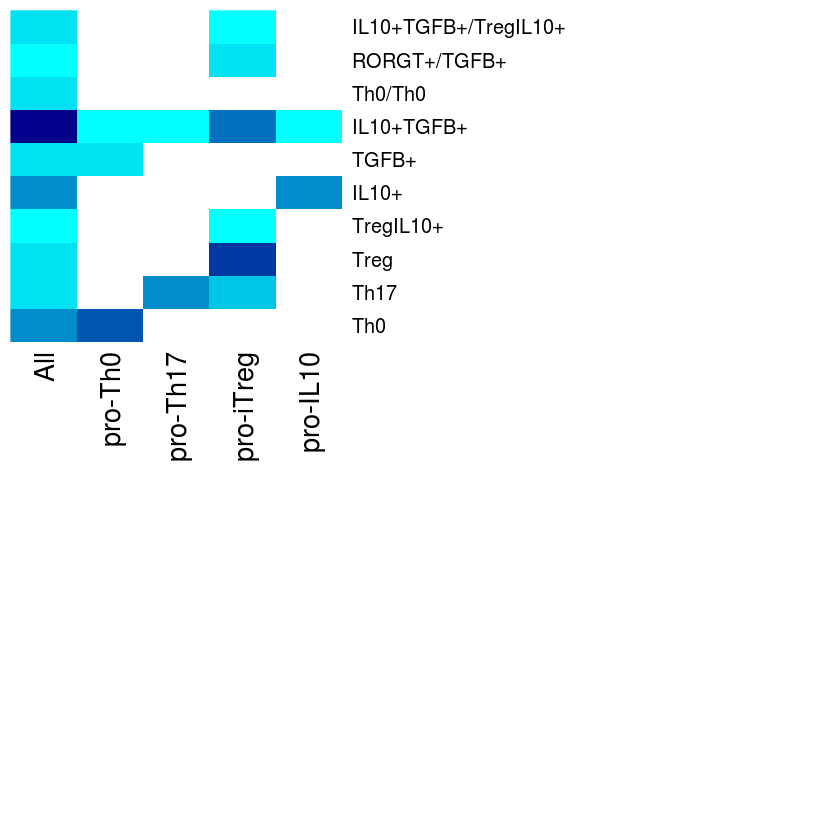

In [20]:
env.attr.by.label.matrix <- data.matrix(env.attr.by.label) #convert to matrix
env.attr.by.label.matrix[env.attr.by.label.matrix==0] <- NA #replace 0s for NAs
colfunc <- colorRampPalette(c("cyan", "darkblue")) #nice color scale
env.attr.heatmap <- heatmap(env.attr.by.label.matrix,  # the heatmap
                            Rowv=NA, Colv=NA, 
                            col= colfunc(10),
                            scale="column", margins=c(25,25))

As we can see, some cell types are highly dependent of the environment (Th0, iTreg, IL10+, TGFB+), some are highly robust to changes in the environment (IL10+TGFB+), while other cell-types are intermediate (Th17). Studing the effect of the inputs in the attractors lets us predict which cell types we will see in the biologicaly significant environments.

------------------------------------------------

However, this study only lets us see which cell types are stable in a specific environment. In biologycal systems, the environment of a cell can chamge, inducing differentiation and plasticity. An example of this cell differentiation, where cells change their expression patern in response to changes in the environment.

To study the differentiation of Th cells we can:
1. Take an attractors labeled as Th0
2. Change the value of the input nodes to simulate a change in the environment.
3. Obtain attractor of modified network.
4. Compare with the original attractor.

We will use the function __perturbPathToAttractor()__. This function takes an inital state, a network, and a set of nodes and values to perturb, and returns the resulting attractor.

For example, lets take the Th0 attractor 0 and move it to a pro-Th17 environment.

In [21]:
state <- dec2binState(0, net$genes)
state.label <- labelState(state, net$genes, labels.rules$labels, labels.rules$rules)
state.label

new.state <- perturbPathToAttractor(state, net, 
                c('IL2e', 'IL21e', 'TGFBe', 'IL10e'), c(0,1,1,0))
new.state <- dec2binState(new.attr$attractors[[1]]$involvedStates, net$genes)
new.state.label <- labelState(new.state, net$genes, labels.rules$labels, labels.rules$rules)
new.state.label

[1] "Th0"

ERROR: Error in intToBits(x): object 'new.attr' not found


ERROR: Error in names(state) <- node.names: 'names' attribute [10] must be the same length as the vector [2]


ERROR: Error in eval(expr, envir, enclos): object 'new.state.label' not found


As you can see changing the environment towards Th17 causes the differentiation of a Th0 cell into a Th17 cell. We can see the trajectory of this event.

In [22]:
new.traj <- perturbPathToAttractor(state, net, 
                c('IL2e', 'IL21e', 'TGFBe', 'IL10e'), c(0,1,1,0),
                returnTable = TRUE)
new.traj

,IL2,RORGT,STAT3,FOXP3,TGFB,IL10,IL2e,IL21e,TGFBe,IL10e
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,0
3,0,0,1,0,1,0,0,1,1,0
4,0,1,1,0,1,0,0,1,1,0


We can use this method to study the differentiation of all Th0 attractors in the different environments (pro-Th0, pro-Th17, pro-iTreg and pro-IL10).

First we need to separate the Th0 attractors.

In [23]:
attr.Th0 <- WT.attr.df$involvedStates[which(WT.attr.df$label=="Th0")]
attr.Th0
attr.Th0 <- as.integer(attr.Th0)
attr.Th0 

[1] "0"   "1"   "4"   "65"  "68"  "132" "129" "193" "196"

[1]   0   1   4  65  68 132 129 193 196

Now we will iterate all Th0 attractors with all environments, use __perturbPathToAttractor__ and save the resulting attractor.

In [24]:
# create data frame
transitions <- data.frame(matrix(NA, 
                    nrow = length(attr.Th0), 
                    ncol = length(environments$label)-1 ),
                    stringsAsFactors=FALSE )
colnames(transitions) <- environments$label[2:length(environments$label)]
rownames(transitions) <- attr.Th0
#transitions["pro-Th0"]


In [25]:
# iterate environments and Th0 states
for (i in 2:length(environments$label)) {
    transitions[environments$label[[i]]] <-sapply(attr.Th0, function(state) {
        state <- dec2binState(as.integer(state), net$genes)
        new.state <- perturbPathToAttractor(state, net, 
                        environments$nodes[[i]], environments$values[[i]])
        new.state <- new.state$attractors[[1]]$involvedStates
        new.state
    }) 
}
transitions

,pro-Th0,pro-Th17,pro-iTreg,pro-IL10
0,0,406,345,544
1,1,406,345,544
4,4,406,342,544
65,1,406,345,544
68,4,406,342,544
132,4,406,342,544
129,1,406,345,544
193,1,406,345,544
196,4,406,342,544


As we can see, in an environment most Th0 cells tend to converge towards a single attractor.

Now, lets label this states.

In [26]:
transitions.labels <- as.data.frame(lapply(transitions, function(env) {
    sapply(env, function(state) {
        state <- dec2binState(state, net$genes)
        labelState(state, net$genes, labels.rules$labels, labels.rules$rules)
    })
}))
transitions.labels

,pro.Th0,pro.Th17,pro.iTreg,pro.IL10
1,Th0,Th17,Treg,IL10+
2,Th0,Th17,Treg,IL10+
3,Th0,Th17,Th17,IL10+
4,Th0,Th17,Treg,IL10+
5,Th0,Th17,Th17,IL10+
6,Th0,Th17,Th17,IL10+
7,Th0,Th17,Treg,IL10+
8,Th0,Th17,Treg,IL10+
9,Th0,Th17,Th17,IL10+


Biological explanation
Differentiation is ighly sensible to polaring environments
Sometimes inital conditions can affect the attractor
Coexistance of Th17/iTreg has implications for chronic inflamation
This can be done for all environments!

## Truth tables

Trough evolution the regulatory interactions of an organism can change. This changes are not always loss-of-function mutations or over-expressions, they can also be smaller changes in the regulatory function. For example, the regulatory sequence of a gene can be altered or a new element can be added (or lost)\cite{Carlos???}, or a positive interaction can become negative. However, this changes can also occur during the life of an organism: changes in the epigenetic marks, disordered domain proteins, and alternate spliccing can alter the regulatory functions\cite{Newman2014}. Finally, it is possible that there are mistakes in the construction of the network.

This changes usually affect only part of the regulatory function. Verifing the robustness of the attractors in response to small changes in the functions is fundamental for validating the network and for understanding the evolvability of biological systems.

To do this we will use truth tables. Truth tables are a representation of Boolean functions. They have one column for each input variable, and one final column for all of the possible results of the logical operation that the table is meant to represent.

For example, the funtion:
> C = A and not B

Can be represented as:


| A | B | C |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

We can perturb this table by changing one of the values of the truth table.

| A | B | C* |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | __1__ |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

This new table corresponds to the function:

> C = A xor B



We can do simulate this function perturbations using the BoolNet function __perturbNetwork()__.

In [31]:
perturbed.net <- perturbNetwork(net, perturb="functions")
pertubed.attr <- getAttractors(perturbed.net)
pertubed.attr.df <- attractor2dataframe(pertubed.attr)
pertubed.attr.df

,involvedStates,basinSize
1,0,27
2,1,2
3,4,14
4,16,21
5,65,35
6,68,8
7,89,21
8,132,62
9,129,2
10,193,2


We can compare this results with the attractors of our WT network. Here we show the difference between the two sets of attractors. As __perturbNetwork()__ randomly changes a value of the table it is a good idea to repeat the experiment multiple times

In [32]:
#intersect(WT.attr.df$involvedStates, pertubed.attr.df$involvedStates)
setdiff(WT.attr.df$involvedStates, pertubed.attr.df$involvedStates)

[1] "48"      "112"     "121"     "176"     "240"     "249"     "304"    
 [8] "368"     "377"     "432"     "496"     "505"     "113/120" "241/248"
[15] "369/376" "497/504"

As this is a random analysis it is useful to repeat it multiple times. The following code, taken from the BoolNet package vignate, "performs a robustness test on a network by counting the numbers of perturbed networks containing the attractors of the original net. (This may take a while)

In [36]:
# get attractors in original network
attrs <- getAttractors(net)
# create 1000 perturbed copies of the network and search for attractors
perturbationResults <- sapply(1:1000,function(i)
{
# perturb network and identify attractors
perturbedNet <- perturbNetwork(net, perturb="functions", method="bitflip")
perturbedAttrs <- getAttractors(perturbedNet, canonical=TRUE)
# check whether the attractors in the original network exist in the perturbed network
attractorIndices <- sapply(attrs$attractors,function(attractor1)
{
index <- which(sapply(perturbedAttrs$attractors,function(attractor2)
{
identical(attractor1,attractor2)
}))
if (length(index) == 0)
NA
else
index
})
return(attractorIndices)
})
# perturbationResults now contains a matrix
# with the first 2 columns specifying the indices or the
# original attractors in the perturbed network
# (or NA if the attractor was not found) and the next 2
# columns counting the numbers of states
# in the basin of attraction (or NA if the attractor was not found)
# measure the total numbers of occurrences of the original attractors in the perturbed copies
numOccurrences <- apply(perturbationResults[1:length(attrs$attractors),,drop=FALSE], 1,
function(row)sum(!is.na(row)))
# print original attractors
cat("Attractors in original network:\n")
#print(attrs)
# print information
cat("Number of occurrences of the original attractors",
"in 1000 perturbed copies of the network:\n")
for (i in 1:length(attrs$attractors))
{
cat("Attractor ",i,": ",numOccurrences[i],"\n",sep="")
}

Attractors in original network:
Number of occurrences of the original attractors in 1000 perturbed copies of the network:
Attractor 1: 395
Attractor 2: 664
Attractor 3: 460
Attractor 4: 461
Attractor 5: 516
Attractor 6: 399
Attractor 7: 580
Attractor 8: 479
Attractor 9: 509
Attractor 10: 601
Attractor 11: 432
Attractor 12: 659
Attractor 13: 516
Attractor 14: 642
Attractor 15: 576
Attractor 16: 494
Attractor 17: 512
Attractor 18: 598
Attractor 19: 409
Attractor 20: 457
Attractor 21: 484
Attractor 22: 410
Attractor 23: 578
Attractor 24: 401
Attractor 25: 597
Attractor 26: 506
Attractor 27: 483
Attractor 28: 542
Attractor 29: 574
Attractor 30: 398
Attractor 31: 594
Attractor 32: 443
Attractor 33: 450
Attractor 34: 445
Attractor 35: 468
Attractor 36: 464
Attractor 37: 422
Attractor 38: 429
Attractor 39: 427
Attractor 40: 465
Attractor 41: 472
Attractor 42: 545
Attractor 43: 369
Attractor 44: 465
Attractor 45: 553
Attractor 46: 383
Attractor 47: 462
Attractor 48: 500
Attractor 49: 380
Attra

T

# Next

* [Introduction](./RPRN-Introduction.ipynb)
* [BoolNet](./RPRN-BoolNet.ipynb)
* Functions
* [Updating](./RPRN-Updating.ipynb)
* [States](./RPRN-States.ipynb)
* [Appendix](./RPRN-Appendix.ipynb)